# Liners age

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import re
from dateutil.parser import parse
import string
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set_style("darkgrid")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# read
tags=pd.read_excel("../../data/meta data/tags relevantes.xlsx")
tags_cc=tags.tag.to_list()
dic={}
for i,j in zip(tags.tag,tags.description):
    dic[i]=j

### 2. Data Loading

In [4]:
# Se lee csv
df=pd.read_csv('../../data/consolidated data/cleaned_15December2022.csv', parse_dates=['Timestamp'], index_col='Timestamp')
df.sort_index(inplace=True)
df.rename(columns=dic,inplace=True)
df.head()

,sag mill expert system,Limitado por Límite Alto de Tonelaje,Optimizando tonelaje,Limitado por Peso,Limitado por Corriente Bobina,Limitado por torque espesador 2,Limitado por torque espesador 3,Limitado por Potencia Bolas 1,Limitado por Potencia Bolas 2,Limitado por Pebbles,Limitado por Corriente harnero,Limitado por Potencia SAG,Limitado por limite bajo de tonelaje,Limitado por Temperatura bobina,Limitado por presión espesador 2,Limitado por presión espesador 3,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,torque,charge cell,power,TPH,solid percentage,water,speed,solid,LL charge cell,HH charge cell,HH TPH,stator current,granulometry
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.499208,864.295848,23071.203516,3847.009774,65.090716,2063.724810,9.063008,65.0,820.0,900.0,4350.0,3935.520368,NaN
2018-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.410009,862.125504,23043.030173,3872.996001,65.171210,2072.257994,9.062102,65.0,820.0,900.0,4350.0,3930.839200,NaN
2018-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.261466,859.956386,22991.287211,3879.211149,65.122192,2079.820066,9.062520,65.0,820.0,900.0,4350.0,3923.503230,NaN
2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.115891,858.914758,22943.243462,3894.792946,65.085609,2089.536865,9.062208,65.0,820.0,900.0,4350.0,3914.689267,62.811786
2018-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.054172,857.932221,22921.665087,3959.416847,65.271563,2110.715057,9.062822,65.0,820.0,900.0,4350.0,3910.292390,62.749109


In [5]:
campañas=pd.read_csv("../../data/meta data/campaign_17December2022.csv")
campañas["Fechas"]=campañas["Fechas"]+' 00:00:00'
campañas.Fechas=pd.to_datetime(campañas.Fechas)
campañas

,anio,mes,dia,Fechas,CC referencial
0,2018,4,28,2018-04-28,775
1,2018,10,28,2018-10-28,775
2,2019,4,16,2019-04-16,775
3,2019,10,11,2019-10-11,775
4,2020,5,3,2020-05-03,775
5,2021,1,16,2021-01-16,775
6,2021,7,11,2021-07-11,775
7,2022,1,27,2022-01-27,775


# Generación de edades historicas

In [6]:
# Timestamp 1 min
date_format = "%Y-%m-%d %H:%M:%S"

start = datetime.strptime("2018-01-01 00:00:00", date_format )
end = datetime.strptime("2022-09-15 23:59:00", date_format )
timestep = 1
time_freq = str(timestep) + 'min'
timestamps = pd.DataFrame(pd.date_range(start, end, freq=time_freq))

timestamps.rename(columns={0:"Timestamp"},
               inplace=True)

In [7]:
edades=pd.DataFrame()
edades["Timestamp"]=timestamps
edades.head()

,Timestamp
0,2018-01-01 00:00:00
1,2018-01-01 00:01:00
2,2018-01-01 00:02:00
3,2018-01-01 00:03:00
4,2018-01-01 00:04:00


In [8]:
# Campañas historicas a lista
inicios_campañas=campañas["Fechas"].tolist()
inicios_campañas

[Timestamp('2018-04-28 00:00:00'),
 Timestamp('2018-10-28 00:00:00'),
 Timestamp('2019-04-16 00:00:00'),
 Timestamp('2019-10-11 00:00:00'),
 Timestamp('2020-05-03 00:00:00'),
 Timestamp('2021-01-16 00:00:00'),
 Timestamp('2021-07-11 00:00:00'),
 Timestamp('2022-01-27 00:00:00')]

In [9]:
# Se agrega el inicio  y fin de la data (Debe ser datetime.now() cuando se lleve a producción)
inicio=parse('2018-01-01 00:00:00')
fin=max(df['charge cell'][~df['charge cell'].isnull()].index)
inicios_campañas.insert(0, inicio)
inicios_campañas.append(fin)
inicios_campañas

[datetime.datetime(2018, 1, 1, 0, 0),
 Timestamp('2018-04-28 00:00:00'),
 Timestamp('2018-10-28 00:00:00'),
 Timestamp('2019-04-16 00:00:00'),
 Timestamp('2019-10-11 00:00:00'),
 Timestamp('2020-05-03 00:00:00'),
 Timestamp('2021-01-16 00:00:00'),
 Timestamp('2021-07-11 00:00:00'),
 Timestamp('2022-01-27 00:00:00'),
 Timestamp('2022-05-02 01:59:00')]

In [10]:
for i in range(len(inicios_campañas)-1):
    print(inicios_campañas[i],inicios_campañas[i+1])

2018-01-01 00:00:00 2018-04-28 00:00:00
2018-04-28 00:00:00 2018-10-28 00:00:00
2018-10-28 00:00:00 2019-04-16 00:00:00
2019-04-16 00:00:00 2019-10-11 00:00:00
2019-10-11 00:00:00 2020-05-03 00:00:00
2020-05-03 00:00:00 2021-01-16 00:00:00
2021-01-16 00:00:00 2021-07-11 00:00:00
2021-07-11 00:00:00 2022-01-27 00:00:00
2022-01-27 00:00:00 2022-05-02 01:59:00


In [11]:
# Clasificación de edades del molino en el periodo definido
edades["Edad"]=""
for i in range(len(inicios_campañas)-1):
    #print(inicios_campañas[i],inicios_campañas[i+1])
    mascara_campañas=(edades["Timestamp"] >= inicios_campañas[i]) & (edades["Timestamp"] < inicios_campañas[i+1])
    edades["Edad"][mascara_campañas]=edades["Timestamp"][mascara_campañas].apply(lambda x: min((x-inicios_campañas[i]).days//60+1,3))
edades["Edad"]=edades["Edad"].astype(str)
edades["Edad"]=pd.to_numeric(edades["Edad"], errors='coerce')
edades["Edad"]=edades["Edad"]-1
edades.head() 

,Timestamp,Edad
0,2018-01-01 00:00:00,0.0
1,2018-01-01 00:01:00,0.0
2,2018-01-01 00:02:00,0.0
3,2018-01-01 00:03:00,0.0
4,2018-01-01 00:04:00,0.0


In [12]:
# La edad de los liners para el periodo 2018-01-01 - 2018-04-28 debe ser incrementada en 1 producto de que la campaña comenzo
# antes del 2018
edades["Edad"][edades["Timestamp"]<"2018-04-28 00:00:00"]=edades[edades["Timestamp"]<"2018-04-28 00:00:00"]["Edad"]+1

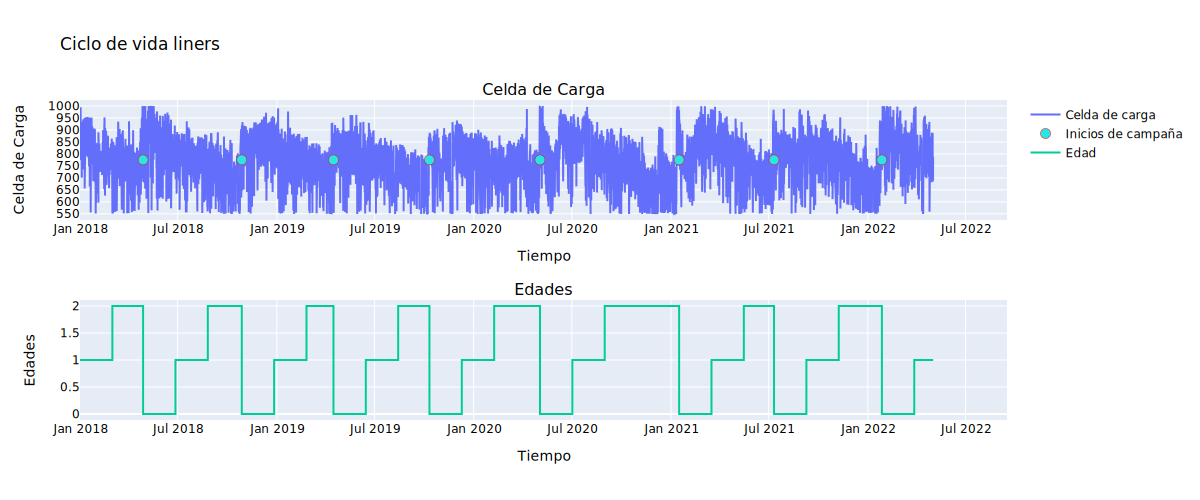

In [13]:
# Graficos
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Celda de Carga", "Edades"))


fig.add_trace(go.Scatter(x=df['charge cell'].index, y=df['charge cell'],
                    mode='lines',
                    name="Celda de carga"),row=1, col=1)


fig.add_trace(go.Scatter(x=campañas["Fechas"], y=campañas["CC referencial"],
                    mode='markers',
                    name="Inicios de campaña",marker=dict(color='#26E6E6',size=10,line=dict(color='red',width=0.5))),row=1, col=1)
    

fig.add_trace(go.Scatter(x=edades["Timestamp"], y=edades["Edad"],
                    mode='lines',
                    name="Edad"),row=2, col=1)
    


fig.update_layout(title_text="Ciclo de vida liners",height=500,
                  width=1200,font=dict(color="black"))

# Update xaxis properties
fig.update_xaxes(title_text="Tiempo", row=1, col=1)
fig.update_xaxes(title_text="Tiempo",row=2, col=1)



# Update yaxis properties
fig.update_yaxes(title_text="Celda de Carga" ,row=1, col=1,tickvals=[550+50*i for i in range(10)])
fig.update_yaxes(title_text="Edades",  row=2, col=1)


fig.show(renderer="svg")

In [14]:
# Generación edades historicas
edades.to_csv('../../data/consolidated data/liners_age_'+pd.to_datetime('today').strftime('%d%B%Y')+'.csv', index=False)